<a href="https://colab.research.google.com/github/ivanrango/Machine-Learning/blob/master/Trabajo_Pr%C3%A1ctico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1:

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
df=pd.read_csv(url)
print(df.head(5))

        fecha  confirmados  ...  aislamiento_por_contacto_estrecho  aprehendidos
0  2020-06-30          106  ...                                181             0
1  2020-07-01          114  ...                                172             0
2  2020-07-02          124  ...                                176             0
3  2020-07-03          137  ...                                190             0
4  2020-07-04          154  ...                                214             0

[5 rows x 11 columns]


In [ ]:
print(df)

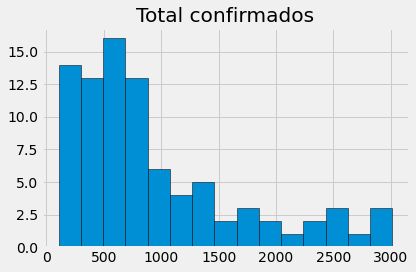

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

conf=df[['confirmados']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(conf, bins=15, edgecolor='black')
plt.title('Total confirmados')
#plt.xlabel('')
#plt.ylabel('')

plt.tight_layout()

plt.show()

Se observa que el total de confirmados no sigue una distribución normal o Gaussiana. Estos datos son agregados, es decir, a cada nuevo dato se le suma el anterior. Por lo tanto es de interés ver el comportamiento de los datos desagregados (casos diarios).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


conf=df[['confirmados']].T.to_numpy()
#print(conf.shape)
#print(conf)



In [ ]:
confb = [conf[0,0]]
#print(confb)
for i in range (1,88):
  #confb = np.array([conf])
  #confb = np.insert([conf[0,0]],1,[conf[0,i]])
   aux = [conf[0,i]-conf[0,i-1]]
   #confb.append(aux)
   confb = np.append([confb],aux)
  #print(conf[0,i])
#print(confb.shape)
#print(confb)

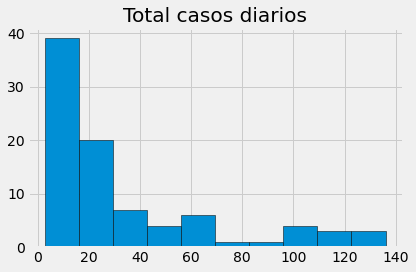

In [56]:
plt.hist(confb, bins=10, edgecolor='black')
plt.title('Total casos diarios')
plt.tight_layout()

plt.show()

De manera similar, se observa que los casos diarios tampoco siguen una distribución Gaussiana, de hecho a simple vista la tendencia parece ser exponencial decreciente.